# Project 1: Investigate a Dataset - [TMDb Movies]

>  by EMMANUEL NCUBE

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> What can we say about the success of a movie before it is released? Are there certain companies (Warner Bros.?) that have found a consistent formula? Given that major films costing over $100 million to produce can still flop, this question is more important than ever to the industry. Film aficionados might have different interests. Can we predict which films will be highly rated, whether or not they are a commercial success? ___(credit: kaggle)___
>
### Dataset Description 

> We shall analyse a data set which contains information about 10000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
> The dataset is from [kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata) and contains information about 10,866 movies collected from The Movie Database (TMDb), including popularity, revenue, budget, cast and genres. 

> _(This analysis is part of the fulfillment of the Udacity Data Analyst Nanodegree.)_

### Analysis questions

> This analysis will seek to answer the following important questions:
> **<ol> 
    <li>Which genres are most popular over the years?</li>
    <li>Which properties are associated with higher revenues?</li>
    <li>Does higher budget mean higher profitability?</li>
    <li>Which actors are associated with higher revenue and profit?</li>
    <li>Which director produces movies with highest revenue and profit?</li>
  </ol>**

In [242]:
# load the necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import json
pd.set_option('display.max_columns', 25)
pd.options.display.max_rows = 11000

In [243]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas

Requirement already up-to-date: pandas in /opt/conda/lib/python3.6/site-packages (1.1.5)


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, we will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. 

In [244]:
# Let's load the data and print out a few lines.
movies = pd.read_csv("Database_TMDb_movie_data/tmdb-movies.csv")
movies.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


> **We can observe that cast, director and genres columns have values seperated by "|".**

### General Properties

#### Lets's see the number of columns and rows.

In [245]:
print(F"There are {movies.shape[0]} rows and {movies.shape[1]} columns")

There are 10866 rows and 21 columns


#### Let's check column names

In [246]:
movies.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

#### Basic Information

In [247]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> **The data contains some missing values.**

#### Summary statistics

In [248]:
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> **We can observe that 50% of movies have zero budget, revenue and runtime. We will drop such rows.**

### Data Cleaning 

#### Let's check for proportion of missing data 

In [249]:
percent_missing = movies.isnull().sum() * 100 / len(movies)
missing_value_df = pd.DataFrame({'column_name': movies.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df

,column_name,percent_missing
homepage,homepage,72.979937
tagline,tagline,25.989324
keywords,keywords,13.740107
production_companies,production_companies,9.479109
cast,cast,0.699429
director,director,0.404933
genres,genres,0.211669
imdb_id,imdb_id,0.092030
overview,overview,0.036812
budget_adj,budget_adj,0.000000


> **Many of the columns that are irrelevant to our analysis are the ones full of missing data. We will drop such columns first.**

In [250]:
movies.drop(['id','imdb_id','homepage','tagline','keywords','overview','production_companies','release_date',
         'vote_count','runtime','vote_average','budget_adj','revenue_adj'], axis=1, inplace=True)

In [251]:
# number of columns left
print(F"We now have {movies.shape[0]} rows and {movies.shape[1]} columns")

We now have 10866 rows and 8 columns


#### Drop rows with missing data

In [252]:
movies.dropna(axis=0, how='any', inplace=True)

In [253]:
# Checking again for missing data
movies.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
genres            0
release_year      0
dtype: int64

#### Let's check for duplicates and remove them

In [254]:
print(f"There are {movies.duplicated().sum()} duplicated rows.")

There are 1 duplicated rows.


In [255]:
# remove duplicates
movies.drop_duplicates(inplace=True)

In [256]:
print(f"There are now {movies.duplicated().sum()} duplicated rows.")

There are now 0 duplicated rows.


In [257]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10731 non-null  float64
 1   budget          10731 non-null  int64  
 2   revenue         10731 non-null  int64  
 3   original_title  10731 non-null  object 
 4   cast            10731 non-null  object 
 5   director        10731 non-null  object 
 6   genres          10731 non-null  object 
 7   release_year    10731 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 754.5+ KB


In [258]:
print(F"We now have {movies.shape[0]} rows and {movies.shape[1]} columns")

We now have 10731 rows and 8 columns


#### Let's make a copy of our clean data

In [259]:
movies_clean = movies.copy()
movies_clean.head(3)

,popularity,budget,revenue,original_title,cast,director,genres,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,2015


<a id='eda'></a>
## Exploratory Data Analysis


### Q1. Which genres are most popular and profitable over the years?

#### Let's start by adding profit column

In [260]:
movies_clean['profit'] = movies_clean['revenue'] - movies_clean['budget']
movies.head(2)

,popularity,budget,revenue,original_title,cast,director,genres,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,2015


#### Split the genre column into seperate values, each value will be in its own row

In [261]:
# split the values at "|" delimeter and take a snapshot of the data
movies_clean['genres'] = movies_clean['genres'].str.split("|")

In [262]:
df_genres = movies_clean.explode('genres').reset_index(drop=True)
df_genres.head(3)

,popularity,budget,revenue,original_title,cast,director,genres,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action,2015,1363528810
1,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Adventure,2015,1363528810
2,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Science Fiction,2015,1363528810


In [263]:
genre_mean = df_genres.groupby(['genres'])[['popularity','profit']].mean().sort_values(['popularity', 'profit'], ascending=False).iloc[:10,:]
genre_mean

,popularity,profit
genres,,
Adventure,1.158480,7.590377e+07
Science Fiction,1.007173,4.546382e+07
Fantasy,1.000166,6.426782e+07
Action,0.929040,4.521865e+07
Animation,0.885913,5.484601e+07
Family,0.794195,4.976972e+07
Crime,0.745331,2.472312e+07
Thriller,0.742534,2.456400e+07
War,0.732346,2.691265e+07


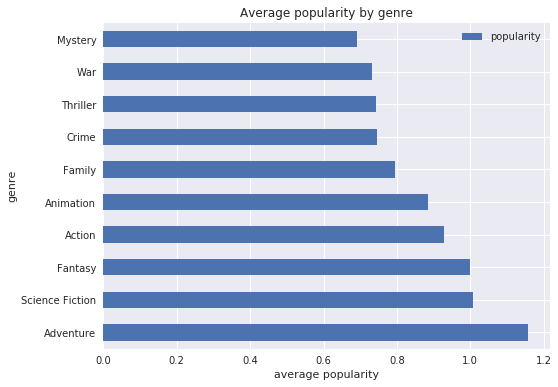

In [264]:
def genre(y, title, xlabel, ylabel):
    bar_graph = genre_mean.plot(y = y, kind='barh', figsize=(8,6))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return bar_graph

title = 'Average popularity by genre'
xlabel = 'average popularity'
ylabel = 'genre'
genre('popularity', title, xlabel, ylabel);

#### What about average profit by genre?

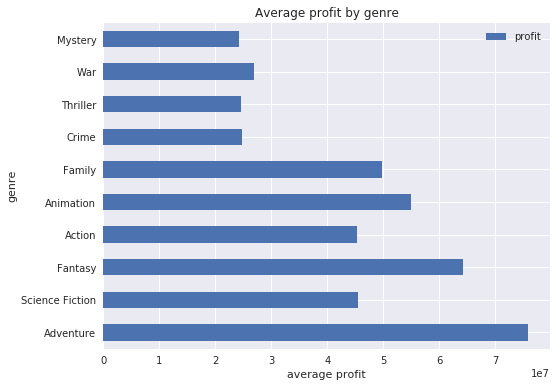

In [265]:
title = 'Average profit by genre'
xlabel = 'average profit'
ylabel = 'genre'
genre('profit',title, xlabel, ylabel);

> **Adventure, Science Fiction, Fantasy, Action and Animation are generally the most popular and profitable genres.**

### Q2. Which properties are associated with higher revenues?

#### Let's exclude movies with zero budget

In [266]:
df_budget = movies_clean.query('budget > 0')
df_budget.shape

(5153, 9)

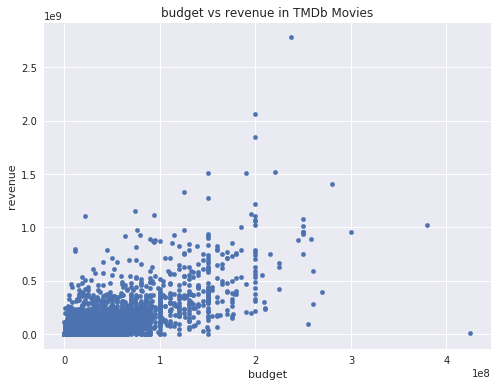

In [267]:
# popularity vs revenue
def revenue_graph(variable, title, ylabel):
    df = df_budget.plot(x=variable, y='revenue',kind='scatter', figsize=(8,6))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('revenue')
    return df

variable = 'budget'
title = 'budget vs revenue in TMDb Movies'
xlabel = 'budget'
revenue_graph(variable, title, ylabel);

In [268]:
df_budget['budget'].corr(df_budget['revenue'])

0.6999014756126575

> **Generally, there is a strong positive correlation between budget and revenue. However there are few outliers**

#### What about popularity and revenue?

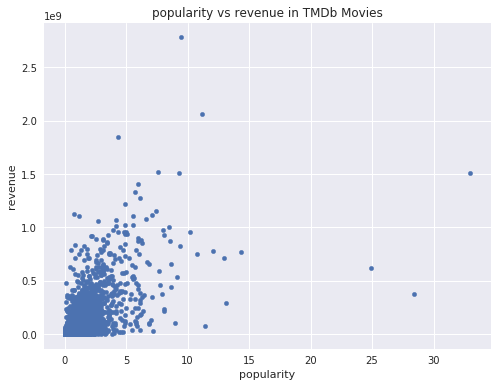

In [269]:
variable = 'popularity'
title = 'popularity vs revenue in TMDb Movies'
xlabel = 'popularity'
revenue_graph(variable, title, ylabel);

In [270]:
df_budget['popularity'].corr(df_budget['revenue'])

0.6388730754971237

> **There is a moderate positive correlation between popularity and revenue. However there are few outliers.**

#### Let's use a heatmap to measure correlation 

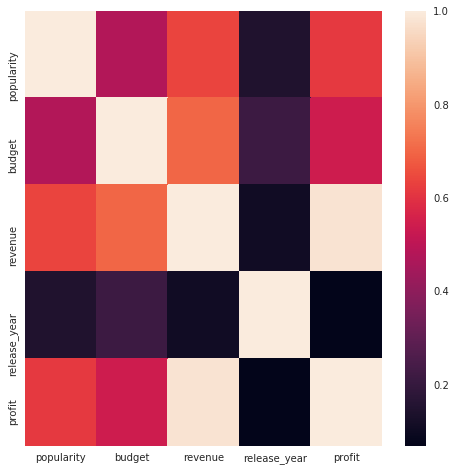

In [271]:
plt.figure(figsize=(8, 8))
sns.heatmap(df_budget.corr());

> **The heatmap shows a moderate positive relationship between revenue and budget/popularity.**

### 3. Does higher budget mean higher profitability?

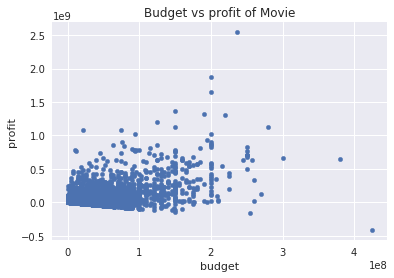

In [272]:
df_budget.plot(x='budget', y='profit', kind='scatter')
plt.title('Budget vs profit of Movie')
plt.xlabel('budget')
plt.ylabel('profit');

In [273]:
df_budget['profit'].corr(df_budget['budget'])

0.5381891971341395

> **There is a moderate positive relationship between budget and profitability. However, there are few movies with higher budgets that realise losses.**

### Q4. Which actors are associated with higher revenue and profit?

In [274]:
# split the cast values at "|" delimeter and take a snapshot of the data
movies_clean['cast'] = movies_clean['cast'].str.split("|")
df_cast = movies_clean.explode('cast').reset_index(drop=True)
df_cast.head(3)

,popularity,budget,revenue,original_title,cast,director,genres,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,"[Action, Adventure, Science Fiction, Thriller]",2015,1363528810
1,32.985763,150000000,1513528810,Jurassic World,Bryce Dallas Howard,Colin Trevorrow,"[Action, Adventure, Science Fiction, Thriller]",2015,1363528810
2,32.985763,150000000,1513528810,Jurassic World,Irrfan Khan,Colin Trevorrow,"[Action, Adventure, Science Fiction, Thriller]",2015,1363528810


In [275]:
cast_sum = df_cast.groupby(['cast'])[['revenue']].sum().sort_values(['revenue'], ascending=False)
cast_sum.head(3)

,revenue
cast,
Harrison Ford,8922840695
Tom Cruise,8812436186
Tom Hanks,8418142612


> **Actors associated with movies with higher popularity, revenue and profit include Harrison Ford, Tom Cruise and Tom Hanks.**

#### Which top movies did the top actors featured in?

In [276]:
df_cast.query("cast == 'Harrison Ford'").sort_values('revenue', ascending=False).iloc[:1,:]

,popularity,budget,revenue,original_title,cast,director,genres,release_year,profit
15,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,"[Action, Adventure, Science Fiction, Fantasy]",2015,1868178225


In [277]:
df_cast[df_cast['cast'] == 'Tom Cruise'].sort_values('revenue', ascending=False).iloc[:1,:]

,popularity,budget,revenue,original_title,cast,director,genres,release_year,profit
15988,2.95274,145000000,694713380,Mission: Impossible - Ghost Protocol,Tom Cruise,Brad Bird,"[Action, Thriller, Adventure]",2011,549713380


In [278]:
df_cast.query("cast =='Tom Hanks'").sort_values('revenue', ascending=False).iloc[:1,:]

,popularity,budget,revenue,original_title,cast,director,genres,release_year,profit
9109,2.711136,200000000,1063171911,Toy Story 3,Tom Hanks,Lee Unkrich,"[Animation, Family, Comedy]",2010,863171911


> **The top actors by revenue and their top movies they featured in:**
> <ol>
> <li>Harrison Ford - Star Wars: The Force Awakens. </li>
> <li>Tom Cruise - Mission Impossible-Ghost Protocol. </li>
> <li>Tom Hanks - Toy Story 3. </li>
</ol>

### Q5. Which directors produces movies with higher revenue and profit?

In [279]:
# split the director values at "|" delimeter and take a snapshot of the data
movies_clean['director'] = movies['director'].str.split("|")
df_director = movies_clean.explode('director')
df_director.head(3)

,popularity,budget,revenue,original_title,cast,director,genres,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,"[Action, Adventure, Science Fiction, Thriller]",2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,"[Action, Adventure, Science Fiction, Thriller]",2015,228436354
2,13.112507,110000000,295238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",Robert Schwentke,"[Adventure, Science Fiction, Thriller]",2015,185238201


In [280]:
director = df_director.groupby(['director'])[['revenue','profit']].mean().sort_values(['revenue','profit'], ascending=False)
director.iloc[:5,:]

,revenue,profit
director,,
Pierre Coffin,8.903356e+08,8.173356e+08
David Yates,8.308591e+08,6.758591e+08
Colin Trevorrow,7.587683e+08,6.833933e+08
Robert Stromberg,7.584104e+08,5.784104e+08
Lee Unkrich,7.439073e+08,6.191573e+08


> **Averagely, Pierre Coffin produces movies with the higher revenue and profit.**

#### Which top movies did Pierre Coffin produce?

In [281]:
df_director.query('director == "Pierre Coffin"').sort_values(['revenue','profit'], ascending=False).iloc[:1,:]

,popularity,budget,revenue,original_title,cast,director,genres,release_year,profit
8,7.404165,74000000,1156730962,Minions,"[Sandra Bullock, Jon Hamm, Michael Keaton, All...",Pierre Coffin,"[Family, Animation, Adventure, Comedy]",2015,1082730962


In [282]:
df_director.query('director == "David Yates"').sort_values(['revenue','profit'], ascending=False).iloc[:2,:]

,popularity,budget,revenue,original_title,cast,director,genres,release_year,profit
3374,5.711315,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,"[Daniel Radcliffe, Rupert Grint, Emma Watson, ...",David Yates,"[Adventure, Family, Fantasy]",2011,1202817822
1923,4.840588,250000000,954305868,Harry Potter and the Deathly Hallows: Part 1,"[Daniel Radcliffe, Emma Watson, Rupert Grint, ...",David Yates,"[Adventure, Fantasy, Family]",2010,704305868


In [283]:
df_director.query('director == "Colin Trevorrow"').sort_values(['revenue','profit'], ascending=False).iloc[:2,:]

,popularity,budget,revenue,original_title,cast,director,genres,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,"[Action, Adventure, Science Fiction, Thriller]",2015,1363528810
4604,0.408010,750000,4007792,Safety Not Guaranteed,"[Aubrey Plaza, Mark Duplass, Jake Johnson, Kar...",Colin Trevorrow,"[Comedy, Romance, Science Fiction, Drama]",2012,3257792


> Top movies produced by the top producers:
> <ol>
      <li>Pierre Coffin - The Minions</li>
      <li>David Yates - Harry Potter and the Deathly Hallows: Part 2</li>
      <li>Colin Trevorrow - Jurassic World</li>
  </ol>

<a id='conclusions'></a>
## Conclusions

#### 1. Which genres are most popular and profitable over the years?
> The most popular genres are Adventure, Science Fiction and Fantasy.
#### 2.Which properties are associated with higher revenues?
> Generally,higher revenue movies are associated with higher budget,higher popularityand best directors, although there are some outliers.
#### 3. Does higher budget mean higher profitability?
> Generally, the higher the budget for a movie, the higher the profit. However, the analysis shows that there are outliers where a high budget results in losses.
#### 4. Which actors are associated with movies with higher revenue and profit?
> Actors associated with movies with higher popularity, revenue and profit include Harrison Ford (Star Wars: The Force Awakens), Tom Cruise (Mission Impossible-Ghost Protocol3) and Tom Hanks (Toy Story).**
#### 5. Which directors produces movies with highest revenue and profit?
> Averagely, Pierre Coffin produces movies with the highest revenue and profit. Some of the blockbuster movies Pierre Coffin produced include the Minions, Despicable Me and Despicable Me 2.

#### Limitations of the Dataset
> 1. 52% of the dataset have 0 budget, hence the profit and revenue analysis is representated by the remaining 48% of the dataset.
> 2. The currency of the budget and revenue is not explicitly indicated.
> 3. There were multiple genres, cast and directors in each movie, therefore the values of the mentioned columns were split such that each value is allocated to 1 row.
> 4. Further statistical tests can be conducted to check for causality.

#### References
> 1. https://www.geeksforgeeks.org/
> 2. https://pandas.pydata.org/docs/user_guide/index.html
> 3. https://www.kaggle.com/datasets/tmdb/themoviedb.org
> 4. https://www.themoviedb.org/documentation/api


In [284]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0